# Import

In [1]:
#!pip install gcm-filters

In [2]:
import s3fs
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import gcm_filters

# Plotting params

In [3]:
plt.rcParams['figure.figsize'] = (8,5)

In [4]:
%matplotlib inline

# Load data

Load Pangeo catalog

In [5]:
from validate_catalog import all_params
params_dict, cat = all_params()
params_dict.keys()

dict_keys(['GIGATL', 'HYCOM25', 'HYCOM50', 'eNATL60', 'FESOM', 'ORCA36'])

Winter data:

In [6]:
enatl01w = cat.eNATL60(region='1',datatype='surface_hourly', season='fma').to_dask()

Summer data:

In [7]:
enatl01s = cat.eNATL60(region='1',datatype='surface_hourly', season='aso').to_dask()

## Check what is inside

In [8]:
enatl01w

<xarray.Dataset>
Dimensions:        (time_counter: 2136, x: 611, y: 763)
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: x, y
Data variables: (12/13)
    fmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    qt_oce         (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    somecrty       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sometauy       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sosaline       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sossheig       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    ...             ...
    sowaflup       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozocrtx       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    sozotaux       (time_counter, y, x) float32 dask.array<chunksize=(72, 763, 611), meta=np.ndarray>
    tmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    umask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>
    vmask          (y, x) int8 dask.array<chunksize=(763, 611), meta=np.ndarray>

In [9]:
enatl01w.sosstsst

<xarray.DataArray 'sosstsst' (time_counter: 2136, y: 763, x: 611)>
dask.array<open_dataset-15d7181ca20a0eb7c6afa75c9484d9b9sosstsst, shape=(2136, 763, 611), dtype=float32, chunksize=(72, 763, 611), chunktype=numpy.ndarray>
Coordinates: (12/15)
    depth          (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1t            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1u            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e1v            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    e2f            (y, x) float64 dask.array<chunksize=(763, 611), meta=np.ndarray>
    ...             ...
    lat            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    lon            (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lat        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    nav_lon        (y, x) float32 dask.array<chunksize=(763, 611), meta=np.ndarray>
    time_centered  (time_counter) datetime64[ns] dask.array<chunksize=(72,), meta=np.ndarray>
  * time_counter   (time_counter) datetime64[ns] 2010-02-01T00:30:00 ... 2010...
Dimensions without coordinates: y, x
Attributes:
    cell_methods:        time: mean (interval: 40 s)
    interval_operation:  40 s
    interval_write:      1 h
    long_name:           sea surface temperature
    online_operation:    average
    standard_name:       sea_surface_temperature
    units:               degC

## Plot SST at time=0

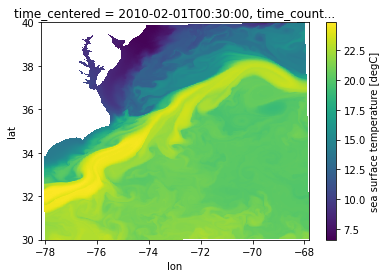

In [10]:
enatl01w.sosstsst.isel(time_counter=0).plot.pcolormesh(x='lon', y='lat')

Take a spacial slice:

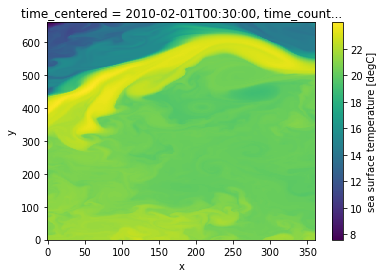

In [43]:
enatl01w.sosstsst.isel(time_counter=0,y=slice(None,660),x=slice(250,None)).plot.pcolormesh()

In [21]:
dx_min = min(enatl01w.e1u.min(['y','x']), enatl01w.e2u.min(['y','x']),
             enatl01w.e1v.min(['y','x']), enatl01w.e2v.min(['y','x'])
            )
dx_min = dx_min.values
dx_min

array(1289.18071484)

# Filter

Parameters (to determine) :

In [75]:
filter_scale=20
dx_min = 1

In [76]:
gaussian_filter = gcm_filters.Filter(
    filter_scale=filter_scale,
    dx_min=dx_min,
    filter_shape=gcm_filters.FilterShape.GAUSSIAN,
    grid_type=gcm_filters.GridType.REGULAR,
)

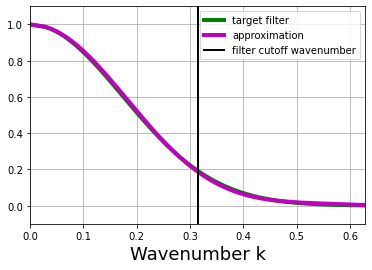

In [77]:
gaussian_filter.plot_shape()

In [78]:
taper_filter = gcm_filters.Filter(
    filter_scale=filter_scale,
    dx_min=dx_min,
    filter_shape=gcm_filters.FilterShape.TAPER,
    grid_type=gcm_filters.GridType.REGULAR,
    transition_width=1.*np.pi
)

<string>:11: UserWarning: Filter scale much larger than grid scale -> numerical instability possible. More information on numerical instability can be found at https://gcm-filters.readthedocs.io/en/latest/theory.html.


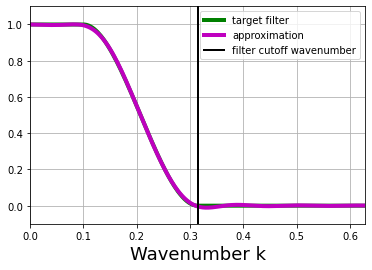

In [79]:
taper_filter.plot_shape()

In [80]:
data_to_filter = enatl01w.sosstsst.isel(time_counter=0,y=slice(None,660),x=slice(250,None))

In [81]:
%time data_filtered = gaussian_filter.apply(data_to_filter, dims=['y', 'x'])

CPU times: user 2.61 ms, sys: 0 ns, total: 2.61 ms
Wall time: 2.58 ms


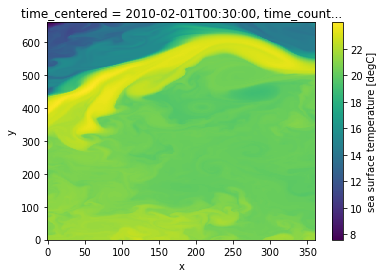

In [82]:
data_to_filter.plot()

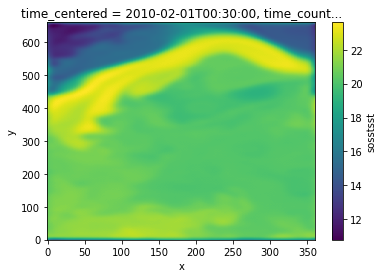

In [83]:
data_filtered.plot()